In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Loading Dataset

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [4]:
house_data = pd.read_csv('kc_house_data.csv',dtype=dtype_dict)
print(house_data.shape)
house_data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


# Function to convert features to Polynomial

In [198]:
def polynomial_dataset(feature,degree,dataset):
    md = pd.DataFrame()
    for i in range(1,degree+1):
        if(len(feature) == 1):
            md['power_'+str(i)]= list(map(lambda x: x**i,dataset[feature[0]]))
        else:
            md['power_'+str(i)]= list(map(lambda x: x**i,dataset[feature[i-1]]))
    return md

In [148]:
house_data = house_data.sort_values(['sqft_living','price'])

In [149]:
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,1924059029,20140617T000000,4668000.0,5.0,6.75,9640.0,13068,1,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270.0,10454.0
9254,9208900037,20140919T000000,6885000.0,6.0,7.75,9890.0,31374,2,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540.0,42730.0
3914,9808700762,20140611T000000,7062500.0,5.0,4.50,10040.0,37325,2,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930.0,25449.0
7252,6762700020,20141013T000000,7700000.0,6.0,8.00,12050.0,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940.0,8800.0


In [150]:
poly_1_data = polynomial_dataset(['sqft_living'],1)
poly_1_data['price'] = house_data['price']
poly_1_data

,power_1,price
0,290.0,221900.0
1,370.0,538000.0
2,380.0,180000.0
3,384.0,604000.0
4,390.0,510000.0
...,...,...
21608,9640.0,360000.0
21609,9890.0,400000.0
21610,10040.0,402101.0
21611,12050.0,400000.0


# Make a Polynomial Regression Model 1(degree : 1)

In [151]:
model_1 = LinearRegression()


In [152]:
X = np.array(poly_1_data['power_1']).reshape(-1,1)
Y = np.array(poly_1_data['price']).reshape(-1,1)
print(X.shape,Y.shape)

(21613, 1) (21613, 1)


In [153]:
model_1.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
print(model_1.intercept_,model_1.coef_)

[508029.80349542] [[15.41340561]]


## Visualizing the model

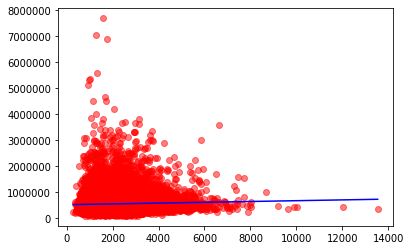

In [155]:
plt.scatter(X,Y,color='r',alpha=0.5)
plt.plot(X,model_1.predict(X),color='b')
plt.show()

# Trying a Polynomial Regression with degree:2

In [156]:
poly_2_data = polynomial_dataset(['sqft_living'],2)
poly_2_data['price'] = house_data['price']
poly_2_data

,power_1,power_2,price
0,290.0,84100.0,221900.0
1,370.0,136900.0,538000.0
2,380.0,144400.0,180000.0
3,384.0,147456.0,604000.0
4,390.0,152100.0,510000.0
...,...,...,...
21608,9640.0,92929600.0,360000.0
21609,9890.0,97812100.0,400000.0
21610,10040.0,100801600.0,402101.0
21611,12050.0,145202500.0,400000.0


In [157]:
model_2 = LinearRegression()

In [160]:
X = np.array(poly_2_data[['power_1','power_2']])
Y = np.array(poly_2_data['price']).reshape(-1,1)
print(X.shape,Y.shape)

(21613, 2) (21613, 1)


In [166]:
model_2.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
print(model_2.intercept_,model_2.coef_)

[520457.81271605] [[4.52984647e+00 1.97480353e-03]]


## Visualizing the Model

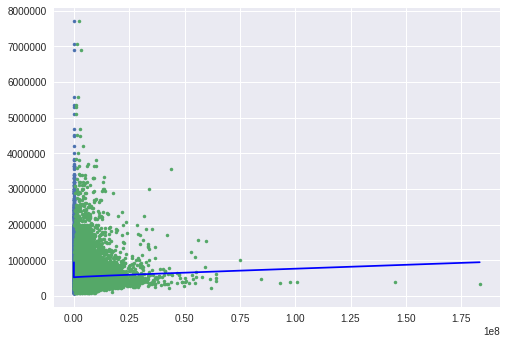

In [174]:
plt.style.use('seaborn')
plt.plot(X,Y,'.')
plt.plot(X,model_2.predict(X),color='b',ls='-')
plt.show()

# Trying a Polynomial Regression with degree:3

In [176]:
poly_3_data = polynomial_dataset(['sqft_living'],3)
poly_3_data['price'] = house_data['price']
poly_3_data


,power_1,power_2,power_3,price
0,290.0,84100.0,2.438900e+07,221900.0
1,370.0,136900.0,5.065300e+07,538000.0
2,380.0,144400.0,5.487200e+07,180000.0
3,384.0,147456.0,5.662310e+07,604000.0
4,390.0,152100.0,5.931900e+07,510000.0
...,...,...,...,...
21608,9640.0,92929600.0,8.958413e+11,360000.0
21609,9890.0,97812100.0,9.673617e+11,400000.0
21610,10040.0,100801600.0,1.012048e+12,402101.0
21611,12050.0,145202500.0,1.749690e+12,400000.0


In [177]:
model_3 = LinearRegression()

In [178]:
X = np.array(poly_3_data[['power_1','power_2','power_3']])
Y = np.array(poly_3_data['price']).reshape(-1,1)
print(X.shape,Y.shape)

(21613, 3) (21613, 1)


In [179]:
model_3.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
print(model_3.intercept_,model_3.coef_)

[564335.31015668] [[-4.59098211e+01  1.74295485e-02 -1.22468704e-06]]


## Visualizing the model

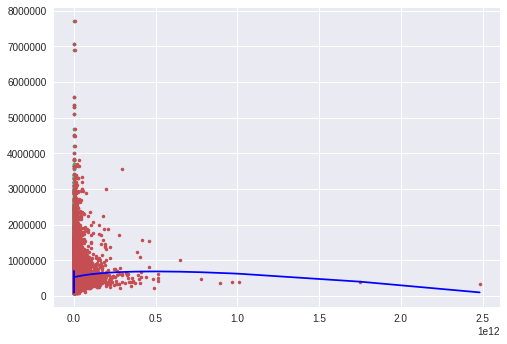

In [183]:
plt.style.use('seaborn')
plt.plot(X,Y,'.')
plt.plot(X,model_3.predict(X),color='b',ls='-')
plt.show()

# Trying a Polynomial Model with Degree:15

In [190]:
poly_4_data = polynomial_dataset(['sqft_living'],15)
poly_4_data['price'] = house_data['price']
poly_4_data


,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,290.0,84100.0,2.438900e+07,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36,221900.0
1,370.0,136900.0,5.065300e+07,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38,538000.0
2,380.0,144400.0,5.487200e+07,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38,180000.0
3,384.0,147456.0,5.662310e+07,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38,604000.0
4,390.0,152100.0,5.931900e+07,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9640.0,92929600.0,8.958413e+11,8.635911e+15,8.325018e+19,8.025317e+23,7.736406e+27,7.457895e+31,7.189411e+35,6.930592e+39,6.681091e+43,6.440572e+47,6.208711e+51,5.985197e+55,5.769730e+59,360000.0
21609,9890.0,97812100.0,9.673617e+11,9.567207e+15,9.461968e+19,9.357886e+23,9.254949e+27,9.153145e+31,9.052460e+35,8.952883e+39,8.854401e+43,8.757003e+47,8.660676e+51,8.565409e+55,8.471189e+59,400000.0
21610,10040.0,100801600.0,1.012048e+12,1.016096e+16,1.020161e+20,1.024241e+24,1.028338e+28,1.032452e+32,1.036581e+36,1.040728e+40,1.044891e+44,1.049070e+48,1.053266e+52,1.057480e+56,1.061709e+60,402101.0
21611,12050.0,145202500.0,1.749690e+12,2.108377e+16,2.540594e+20,3.061416e+24,3.689006e+28,4.445252e+32,5.356529e+36,6.454617e+40,7.777813e+44,9.372265e+48,1.129358e+53,1.360876e+57,1.639856e+61,400000.0


In [191]:
model_4 = LinearRegression()
features = []
for i in range(1,16):
    features.append('power_' + str(i))
X = np.array(poly_4_data[features])
Y = np.array(poly_4_data['price']).reshape(-1,1)
print(X.shape,Y.shape)

(21613, 15) (21613, 1)


In [192]:
model_4.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
print(model_4.intercept_,model_4.coef_)

[540095.78687012] [[ 3.15440567e-93  4.78072044e-53 -4.04075572e-58  1.71001588e-91
   8.28431221e-77  1.85624106e-73  1.56300321e-69  1.28483700e-65
   1.01697633e-61  7.58674721e-58  5.13871106e-54  2.92364277e-50
   1.11701557e-46 -1.85428685e-50  7.57971194e-55]]


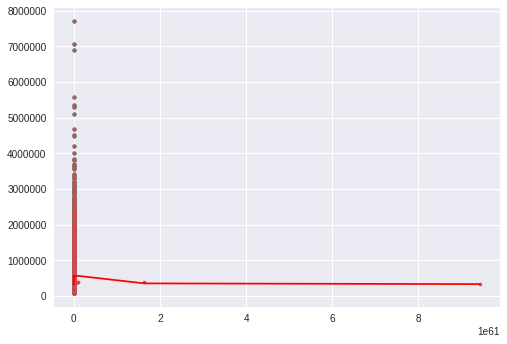

In [194]:
plt.style.use('seaborn')
plt.plot(X,Y,'.')
plt.plot(X,model_4.predict(X),color='r',ls='-')
plt.show()

# Trying on different subsets of data 15 degree model

In [201]:
subset_1 = pd.read_csv('wk3_kc_house_set_1_data.csv',dtype=dtype_dict)
subset_2 = pd.read_csv('wk3_kc_house_set_2_data.csv',dtype=dtype_dict)
subset_3 = pd.read_csv('wk3_kc_house_set_3_data.csv',dtype=dtype_dict)
subset_4 = pd.read_csv('wk3_kc_house_set_4_data.csv',dtype=dtype_dict)
print(subset_1.shape,subset_2.shape,subset_3.shape,subset_4.shape)

(5404, 21) (5398, 21) (5409, 21) (5402, 21)


## Subset-1

(5404, 15) (5404, 1)
[539058.81866798] [[ 3.05794168e-90 -1.69394899e-49 -5.61775581e-55 -4.97841222e-60
   3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
   4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
   3.62176959e-44 -5.63501661e-48  2.18641116e-52]]


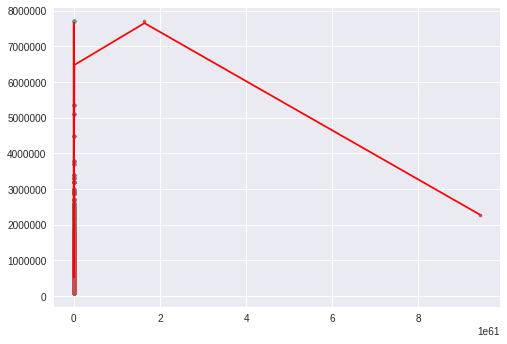

In [203]:
poly_sub_1_data = polynomial_dataset(['sqft_living'],15,subset_1)
poly_sub_1_data['price'] = subset_1['price']
#poly_sub_1_data

model_sub_1 = LinearRegression()
features = []
for i in range(1,16):
    features.append('power_' + str(i))
X = np.array(poly_sub_1_data[features])
Y = np.array(poly_sub_1_data['price']).reshape(-1,1)
print(X.shape,Y.shape)

model_sub_1.fit(X,Y)

print(model_sub_1.intercept_,model_sub_1.coef_)

plt.style.use('seaborn')
plt.plot(X,Y,'.')
plt.plot(X,model_sub_1.predict(X),color='r',ls='-')
plt.show()

## Subset-2

(5398, 15) (5398, 1)
[506897.10511154] [[ 2.71335940e-77  7.33543149e-39 -1.85074320e-44  2.12322141e-50
  -2.08809743e-53  1.51934985e-58  3.64549605e-55  1.50416253e-51
   5.76015646e-48  1.95770491e-44  5.39396521e-41  9.40376329e-38
  -3.63529129e-41  4.65476508e-45 -1.97199740e-49]]


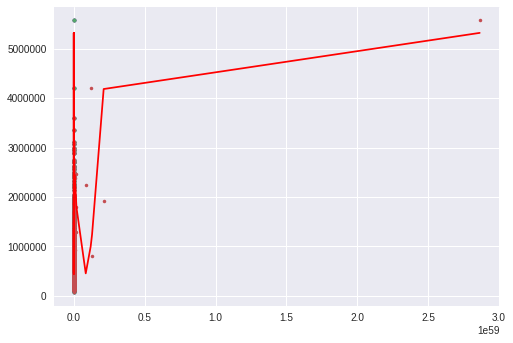

In [205]:
poly_sub_2_data = polynomial_dataset(['sqft_living'],15,subset_2)
poly_sub_2_data['price'] = subset_2['price']
#poly_sub_1_data

model_sub_2 = LinearRegression()
features = []
for i in range(1,16):
    features.append('power_' + str(i))
X = np.array(poly_sub_2_data[features])
Y = np.array(poly_sub_2_data['price']).reshape(-1,1)
print(X.shape,Y.shape)

model_sub_2.fit(X,Y)

print(model_sub_2.intercept_,model_sub_2.coef_)

plt.style.use('seaborn')
plt.plot(X,Y,'.')
plt.plot(X,model_sub_2.predict(X),color='r',ls='-')
plt.show()

# Subset-3

(5409, 15) (5409, 1)
[530874.31665329] [[ 2.83751934e-88 -7.80224148e-49  4.71701806e-55  3.22507898e-85
   1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
   9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
   3.33756141e-43 -6.76238818e-47  3.43132932e-51]]


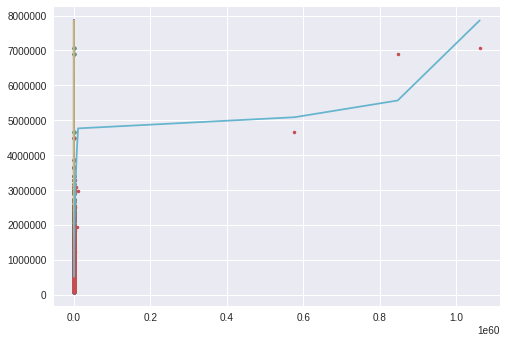

In [206]:
poly_sub_3_data = polynomial_dataset(['sqft_living'],15,subset_3)
poly_sub_3_data['price'] = subset_3['price']
#poly_sub_1_data

model_sub_3 = LinearRegression()
features = []
for i in range(1,16):
    features.append('power_' + str(i))
X = np.array(poly_sub_3_data[features])
Y = np.array(poly_sub_3_data['price']).reshape(-1,1)
print(X.shape,Y.shape)

model_sub_3.fit(X,Y)

print(model_sub_3.intercept_,model_sub_3.coef_)

plt.style.use('seaborn')
plt.plot(X,Y,'.')
plt.plot(X,model_sub_3.predict(X),ls='-')
plt.show()

# Subset-4

(5402, 15) (5402, 1)
[494819.03776173] [[ 1.37116050e-76  2.79678991e-40 -2.13061848e-44 -2.21472830e-49
   4.17619486e-53  5.29002497e-58  1.27070046e-54  4.87868972e-51
   1.73549022e-47  5.47058320e-44  1.39587599e-40  2.25041871e-37
  -9.43954119e-41  1.31573060e-44 -6.09163419e-49]]


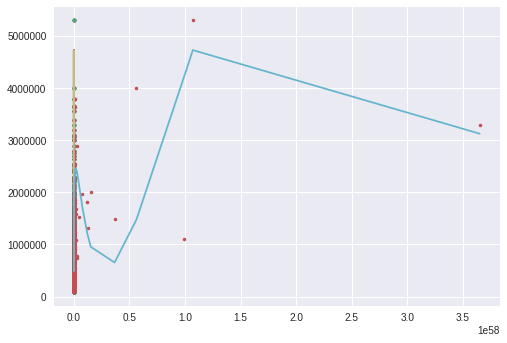

In [207]:
poly_sub_4_data = polynomial_dataset(['sqft_living'],15,subset_4)
poly_sub_4_data['price'] = subset_4['price']
#poly_sub_1_data

model_sub_4 = LinearRegression()
features = []
for i in range(1,16):
    features.append('power_' + str(i))
X = np.array(poly_sub_4_data[features])
Y = np.array(poly_sub_4_data['price']).reshape(-1,1)
print(X.shape,Y.shape)

model_sub_4.fit(X,Y)

print(model_sub_4.intercept_,model_sub_4.coef_)

plt.style.use('seaborn')
plt.plot(X,Y,'.')
plt.plot(X,model_sub_4.predict(X),ls='-')
plt.show()

# Now To Decide Which Degree Polynomial will Fit best

In [209]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv')
test_data = pd.read_csv('wk3_kc_house_test_data.csv')
val_data = pd.read_csv('wk3_kc_house_valid_data.csv')
print(train_data.shape,test_data.shape,val_data.shape)

(9761, 21) (2217, 21) (9635, 21)


In [216]:
rss = {}
for i in range(1,16):
    poly_data = polynomial_dataset(['sqft_living'],i,train_data)
    poly_data['price'] = train_data['price']
    

    model = LinearRegression()
    features = []
    for j in range(1,i+1):
        features.append('power_' + str(j))
    X = np.array(poly_data[features])
    Y = np.array(poly_data['price']).reshape(-1,1)
    Y_val = np.array(val_data['price']).reshape(-1,1)
    X_val = polynomial_dataset(['sqft_living'],i,val_data)

    model.fit(X,Y)
    
    rss['degree_' + str(i)] = np.sum(np.square(Y_val - model.predict(X_val)))

    


In [217]:
rss

{'degree_1': 629097886299585.8,
 'degree_2': 623955062706518.1,
 'degree_3': 625820280251530.8,
 'degree_4': 629987335647053.1,
 'degree_5': 628238442032656.4,
 'degree_6': 566268592700025.0,
 'degree_7': 1073845513449868.8,
 'degree_8': 7087929059350247.0,
 'degree_9': 4.5303237647781784e+16,
 'degree_10': 2.475505467749561e+17,
 'degree_11': 1.1941675110991795e+18,
 'degree_12': 5.102288792337993e+18,
 'degree_13': 7.616230021273821e+17,
 'degree_14': 2.2975609251117233e+18,
 'degree_15': 6.955038097256575e+18}

In [221]:
min(rss.values())

566268592700025.0

# Choosing the best model and computing test RSS

In [225]:
poly_data_6 = polynomial_dataset(['sqft_living'],6,train_data)
poly_data_6['price'] = train_data['price']


model_6 = LinearRegression()
features = []
for i in range(1,7):
    features.append('power_' + str(i))
X = np.array(poly_data_6[features])
Y = np.array(poly_data_6['price']).reshape(-1,1)
X_test = polynomial_dataset(['sqft_living'],6,test_data)
Y_test = np.array(test_data['price']).reshape(-1,1)
print(X.shape,Y.shape)

model_6.fit(X,Y)

print(np.sum(np.square(Y_test - model_6.predict(X_test))))




(9761, 6) (9761, 1)
135225114554205.34


# Questions

2. Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?
#### ANS: NO
13. Quiz Question: True/False the plotted fitted lines look the same in all four plots
#### ANS: False
16. Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?
#### ANS: degree 6
18. Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)
#### ANS: 135225114554205.34